In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
def oxidation_rate(time):
    if time <= 30:
        return 0
    elif 30 < time <= 60:
        return 0.8
    elif 60 < time <= 90:
        return 1.03
    elif 90 < time <= 120:
        return 1.18
    elif 120 < time <= 150:
        return 1.25
    elif time > 150:
        return 1.33

In [ ]:
General model Exp2:
     f(x) = a*exp(b*x) + c*exp(d*x)
Coefficients (with 95% confidence bounds):
       a =     0.02406  (0.01716, 0.03097)
       b =  -4.504e-06  (-2.235e-05, 1.334e-05)
       c =      -0.026  (-0.03247, -0.01952)
       d =  -0.0002919  (-0.000409, -0.0001749)

In [ ]:
General model:
     f(x) = a*atan(c*x^(-b))+d
Coefficients (with 95% confidence bounds):
       a =    -0.01491  (-0.0159, -0.01392)
       b =      -1.696  (-1.985, -1.406)
       c =  -1.801e-06  (-5.955e-06, 2.353e-06)
       d =   -0.000741  (-0.00195, 0.0004682)

In [82]:
def oxidation_rate_continuous(t):
    return -0.01491*np.arctan(-1.801*10**(-6)*t**(1.696))-0.000741

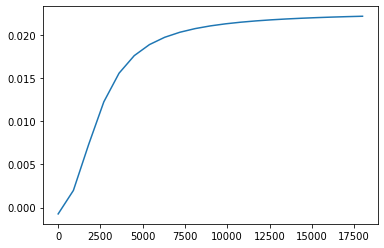

In [84]:
plt.plot(t*60, oxidation_rate_continuous(t*60))

In [102]:
oxidation_rate_continuous(0)

-0.000741

## 1. Race lasting 2 hours

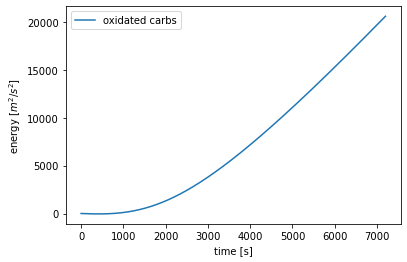

In [100]:
time = np.linspace(0, 120*60, 120*60 + 1)
carbs_resources = [0]
oxidated_carbs = [0]

exogenous = 0

for t in time:
    if t%(35*60)==0:
        exogenous += 30
    oxidated = oxidation_rate_continuous(t)
    if exogenous - oxidated < 0:
        oxidated = exogenous
    exogenous = exogenous - oxidated
    carbs_resources.append(exogenous)
    oxidated_carbs.append(oxidated + oxidated_carbs[-1])
    
# plt.plot(time, carbs_resources[1:], label="carbs resources")
plt.plot(time, np.array(oxidated_carbs[1:]) * 4 * 4164 * 1/75, label="oxidated carbs")
plt.ylabel("energy [$m^2/s^2$]")
plt.xlabel("time [s]")
plt.legend()
plt.show()
    

## Race lasting 2 h 40 min

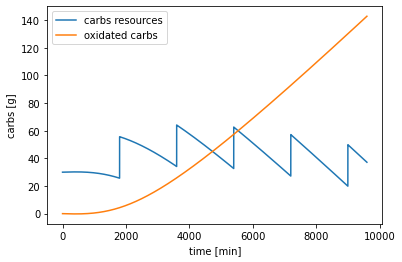

In [94]:
time = np.linspace(0, 160*60, 160*60 + 1)
carbs_resources = [0]
oxidated_carbs = [0]

exogenous = 0

for t in time:
    if t%(60*30)==0:
        exogenous += 30
    oxidated = oxidation_rate_continuous(t)
    if exogenous - oxidated < 0:
        oxidated = exogenous
    exogenous = exogenous - oxidated
    carbs_resources.append(exogenous)
    oxidated_carbs.append(oxidated + oxidated_carbs[-1])
    
plt.plot(time, carbs_resources[1:], label="carbs resources")
plt.plot(time, oxidated_carbs[1:], label="oxidated carbs")
plt.ylabel("carbs [g]")
plt.xlabel("time [min]")
plt.legend()
plt.show()

## Race lasting 5 hours

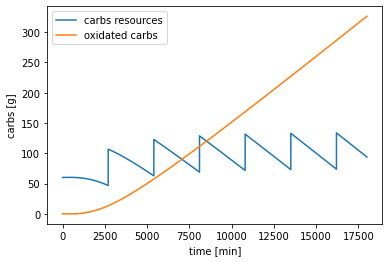

In [96]:
time = np.linspace(0, 300*60, 300*60 + 1)
carbs_resources = [0]
oxidated_carbs = [0]

exogenous = 0

for t in time:
    if t%(60*45)==0:
        exogenous += 60
    oxidated = oxidation_rate_continuous(t)
    if exogenous - oxidated < 0:
        oxidated = exogenous
    exogenous = exogenous - oxidated
    carbs_resources.append(exogenous)
    oxidated_carbs.append(oxidated + oxidated_carbs[-1])
    
plt.plot(time, carbs_resources[1:], label="carbs resources")
plt.plot(time, oxidated_carbs[1:], label="oxidated carbs")
plt.ylabel("carbs [g]")
plt.xlabel("time [min]")
plt.legend()
plt.show()